# Lab notebook
# Name: Weiwei Zheng
# Topic: Media Usage, Employment Status and Political Affiliation

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [6]:
plt.style.use("seaborn-whitegrid")

In [7]:
%matplotlib inline

In [8]:
# load in data
data = pd.read_csv("exploratory-data-analysis/data/gss2012.csv")

In [269]:
# explore news reading behavior
news_data = data.news.fillna("MISSING")
news_group = news_data.value_counts()
news_group

MISSING              673
EVERYDAY             353
NEVER                306
FEW TIMES A WEEK     230
LESS THAN ONCE WK    217
ONCE A WEEK          195
Name: news, dtype: int64

In [270]:
news_value = [353, 230, 217, 195, 306, 673]
news_label = ["Everyday", "Few times a week", "Less than once a week", "Once a week", "Never", "Missing"]

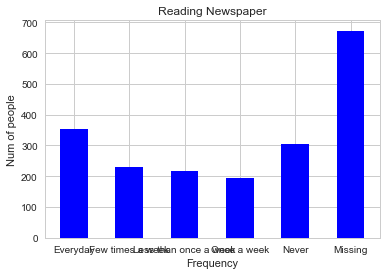

In [271]:
fig, ax = plt.subplots()
ax.bar(range(6), news_value, tick_label = news_label, width = 0.5, color="b")
ax.set(xlabel = "Frequency", ylabel = "Num of people", title = "Reading Newspaper")

About one-third of people never read news on a daily basis. It's interesting to explore the demogrphic attributes of this subgroup.

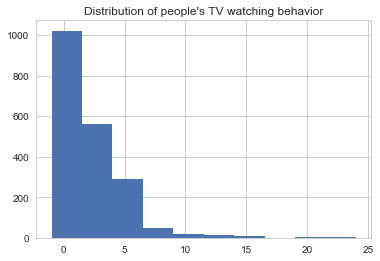

In [272]:
#TV hours and distribution
tvhours_fre = data.tvhours.fillna(-1)
plt.hist(tvhours_fre)
plt.title("Distribution of people's TV watching behavior")

In [273]:
data.tvhours.unique()

array([  1.,  nan,   4.,   3.,   6.,   2.,   5.,   0.,   8.,  16.,  24.,
         7.,  10.,   9.,  20.,  12.,  15.,  22.,  14.,  13.,  18.])

The group of people never watch TV everyday is quite distracting for analyzing this behavior. 

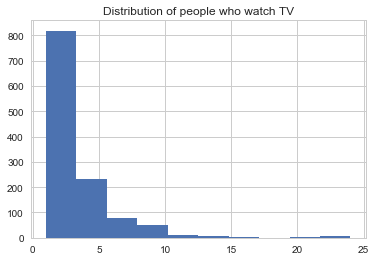

In [274]:
#only explore those wating TV 
filter_1 = data.tvhours > 0
tv_watch_only = data[filter_1]["tvhours"]
plt.hist(tv_watch_only)
plt.title("Distribution of people who watch TV")

In [275]:
tv_watch_only.value_counts()

2.0     325
1.0     255
3.0     238
4.0     171
5.0      61
6.0      58
8.0      31
7.0      19
10.0     17
12.0     11
24.0      5
14.0      4
9.0       3
15.0      3
13.0      2
20.0      2
16.0      1
22.0      1
18.0      1
Name: tvhours, dtype: int64

Subgroups watching tv more than 10 hours every week can be ignored. 

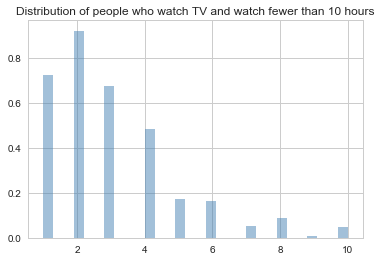

In [277]:
filter_2 = (data.tvhours > 0) & (data.tvhours <=10)
tv_watch_normal = data[filter_2]["tvhours"]
plt.hist(tv_watch_normal, bins=30, normed=True, alpha=0.5,
                histtype='stepfilled', color='steelblue',
                edgecolor='none')
plt.title("Distribution of people who watch TV and watch fewer than 10 hours")

Media usage might be related to employment status, for time available is a determinant factor.

In [278]:
# explore work status
data.wrkstat.unique()

array(['WORKING PART TIME', 'WORKING FULL TIME', nan, 'RETIRED',
       'KEEPING HOUSE', 'SCHOOL', 'UNEMPLOYED, LAID OFF',
       'TEMP NOT WORKING'], dtype=object)

In [279]:
work_status = data.wrkstat.fillna("MISSING")
work_status.value_counts()

WORKING FULL TIME       912
RETIRED                 357
WORKING PART TIME       226
KEEPING HOUSE           210
UNEMPLOYED, LAID OFF    104
SCHOOL                   70
MISSING                  55
TEMP NOT WORKING         40
Name: wrkstat, dtype: int64

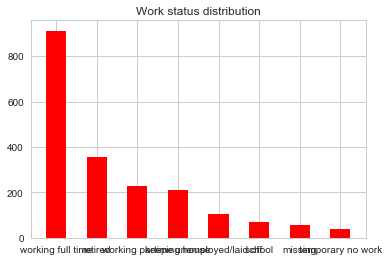

In [280]:
work_status_value = work_status.value_counts()
wrkstat_label = ["working full time", "retired", "working partime", "keeping house", "unemployed/laid off", \
                "school", "missing", "temporary no work"]
fig, ax = plt.subplots()
ax.bar(range(8), work_status_value, tick_label = wrkstat_label, width = 0.5, color="r")
ax.set(title = "Work status distribution")

In [281]:
# explore the relationhips between workstatus and reading newspaper
data_wrkstat_newspaper = data[data.wrkstat != None][data.news != None]

In [282]:
data_wrkstat_newspaper.shape

(1974, 221)

In [283]:
data_wrkstat_newspaper.groupby("news").size()

news
EVERYDAY             353
FEW TIMES A WEEK     230
LESS THAN ONCE WK    217
NEVER                306
ONCE A WEEK          195
dtype: int64

In [284]:
data_wrkstat_newspaper.groupby("wrkstat").size()

wrkstat
KEEPING HOUSE           210
RETIRED                 357
SCHOOL                   70
TEMP NOT WORKING         40
UNEMPLOYED, LAID OFF    104
WORKING FULL TIME       912
WORKING PART TIME       226
dtype: int64

In [285]:
wrkstat_label = list(data_wrkstat_newspaper.wrkstat.unique())
del wrkstat_label[2]

In [338]:
news_label = list(data_wrkstat_newspaper.news.unique())
del news_label[1]

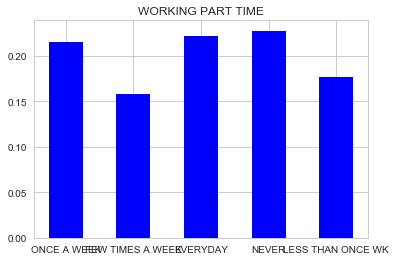

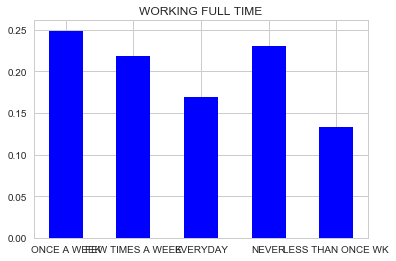

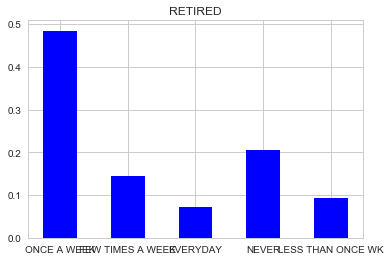

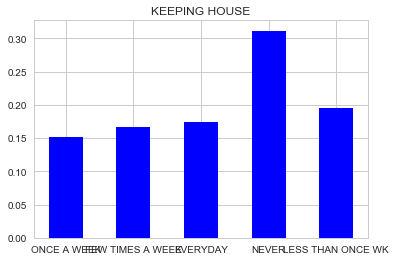

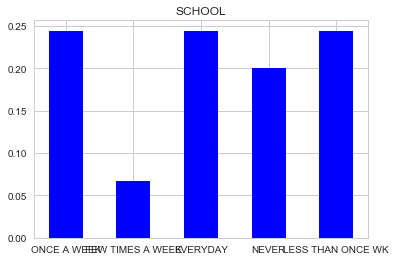

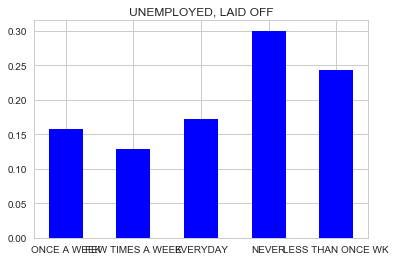

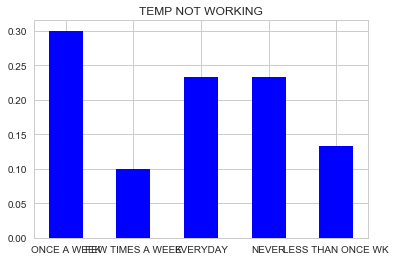

In [288]:
for i in range(len(wrkstat_label)):
    filterx = (data_wrkstat_newspaper.wrkstat == wrkstat_label[i])
    value_list = list(data_wrkstat_newspaper[filterx].groupby("news").size())
    total = sum(value_list)
    fig = plt.figure()
    plt.bar(range(5), value_list/total, tick_label = news_label, width = 0.5, color="b")
    plt.title(wrkstat_label[i])
    plt.show()

There seem to be interesting variations of frequency of reading news within different employment subgroups.

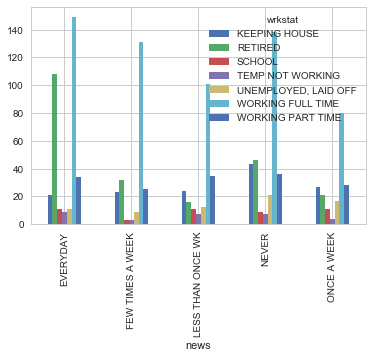

In [294]:
fancy_data = data_wrkstat_newspaper.groupby(["news","wrkstat"]).size().unstack().plot.bar()

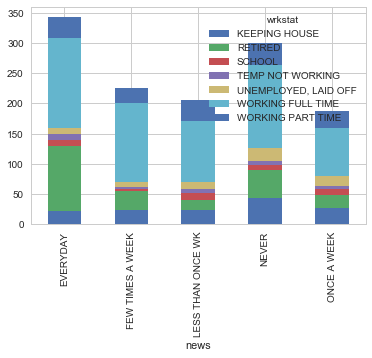

In [295]:
fancy_data = data_wrkstat_newspaper.groupby(["news","wrkstat"]).size().unstack().plot.bar(stacked = True)

In [296]:
# explore the relationhips between workstatus and watching TV
data_wrkstat_tvhours =  data[data.wrkstat != None][data.tvhours != None][data.tvhours <=10]

In [297]:
data_wrkstat_tvhours =  data_wrkstat_tvhours.filter(["wrkstat", "tvhours"], axis =1)

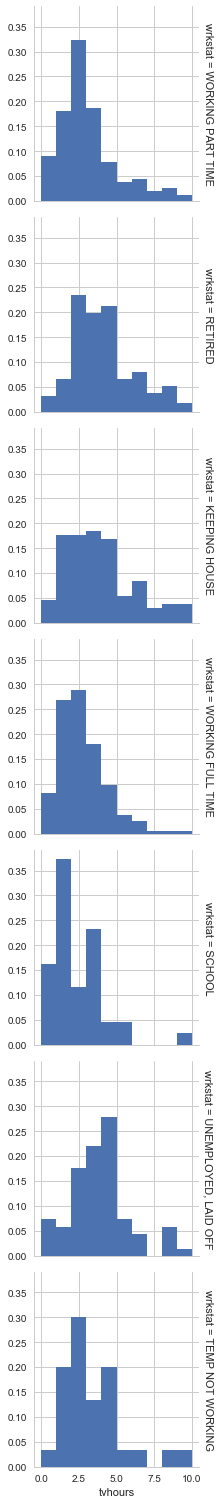

In [298]:
grid = sns.FacetGrid(data_wrkstat_tvhours, row="wrkstat", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True)

Distribution of time watching tv differs greatly between different employment groups

Political affiliation might be another interesting factor influencing/correlated with media usage.

In [299]:
#explore political affiliation
data.partyid

0       IndDem
1       IndRep
2       IndDem
3        WkRep
4       StrDem
5       StrDem
6          Ind
7          Ind
8          Ind
9       StrDem
10      StrDem
11       WkDem
12         Ind
13         Ind
14         Ind
15       WkRep
16       WkRep
17      IndDem
18         NaN
19         Ind
20       WkDem
21       WkDem
22         Ind
23         Ind
24       WkRep
25       WkDem
26       WkRep
27         Ind
28      StrDem
29       WkRep
         ...  
1944    IndDem
1945    StrRep
1946     WkDem
1947    StrRep
1948       NaN
1949     WkDem
1950    StrDem
1951    IndDem
1952       Ind
1953     WkRep
1954    IndRep
1955    IndRep
1956    StrDem
1957       NaN
1958     WkDem
1959    StrDem
1960       Ind
1961     WkRep
1962     WkDem
1963       Ind
1964    StrDem
1965       Ind
1966    StrRep
1967     WkRep
1968       Ind
1969     WkDem
1970    StrDem
1971    IndRep
1972       Ind
1973    IndDem
Name: partyid, Length: 1974, dtype: object

In [9]:
politics_data = data[data.partyid != None][data.polviews != None][data.wrkstat != None]

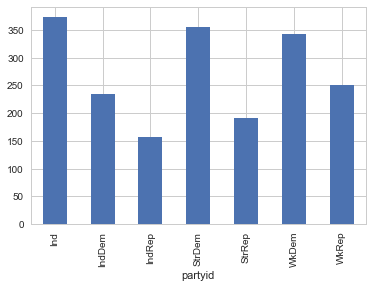

In [301]:
freq_poli = politics_data.groupby("partyid").size().plot.bar()

There seems to be more democrats than republicans in the dataset. 

In [302]:
data.polviews.unique()

array(['Moderate', 'SlghtCons', 'Liberal', 'Conserv', 'ExtrmLib', nan,
       'ExtrmCons', 'SlghtLib'], dtype=object)

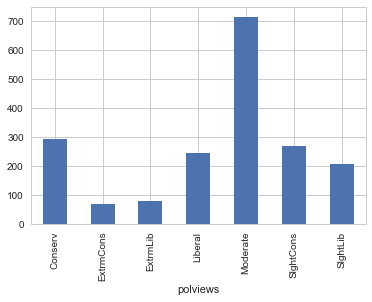

In [303]:
freq_poli = politics_data.groupby("polviews").size().plot.bar()

But as for political views, most people think they are moderate, and proportions of boths political affiliations do not differ significanly.

In order to detect the relationship between political affiliation and media useage, first it's needed to preclude collinarity between political affiliation and work status. 

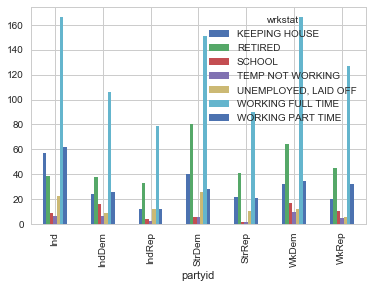

In [304]:
# explore political affiliation and work status
freq_party_work = politics_data.groupby(["partyid", "wrkstat"]).size().unstack().plot.bar()

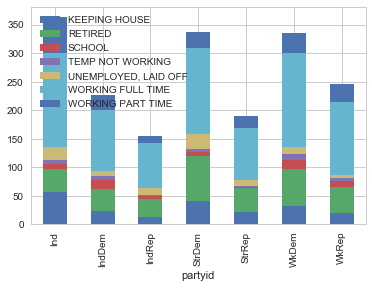

In [305]:
freq_party_work = politics_data.groupby(["partyid", "wrkstat"]).size().unstack().plot.bar(stacked = True).legend(loc = "upper left")

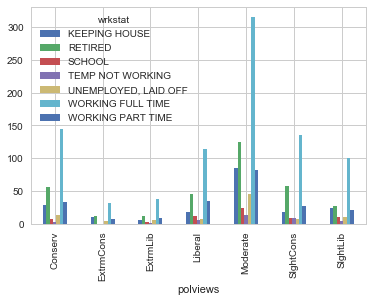

In [306]:
freq_polviews_work = politics_data.groupby(["polviews", "wrkstat"]).size().unstack().plot.bar()

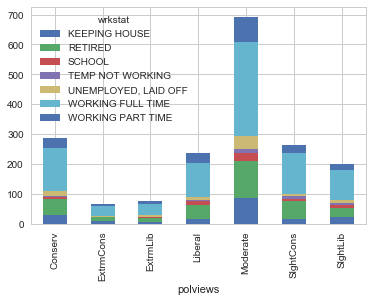

In [307]:
freq_polviews_work = politics_data.groupby(["polviews", "wrkstat"]).size().unstack().plot.bar(stacked = True)

In [308]:
party_label = list(politics_data.partyid.unique())
party_label

['IndDem', 'IndRep', 'WkRep', 'StrDem', 'Ind', 'WkDem', nan, 'StrRep']

In [309]:
del party_label[6]

In [310]:
party_label

['IndDem', 'IndRep', 'WkRep', 'StrDem', 'Ind', 'WkDem', 'StrRep']

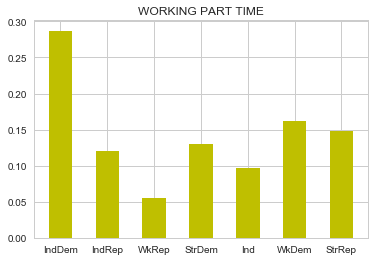

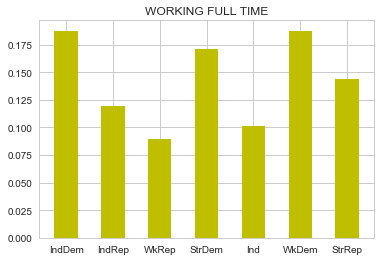

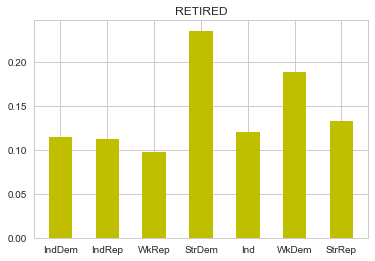

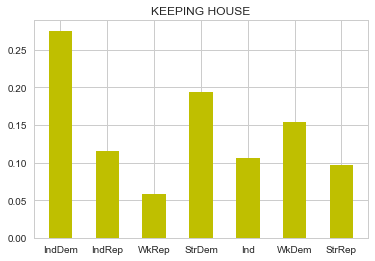

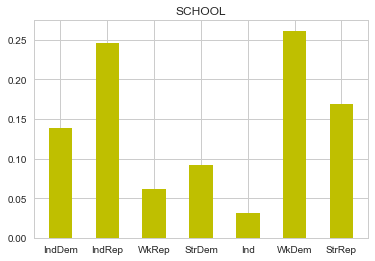

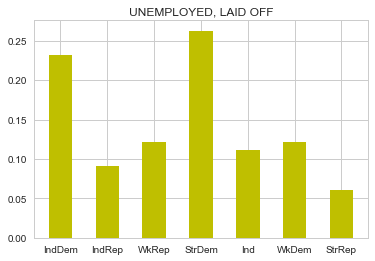

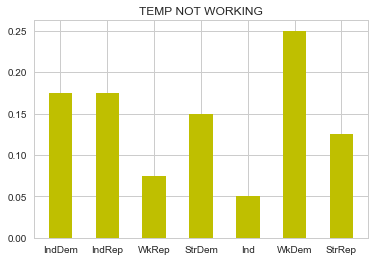

In [311]:
for i in range(len(wrkstat_label)):
    filterx = (politics_data.wrkstat == wrkstat_label[i])
    value_list = list(politics_data[filterx].groupby("partyid").size())
    total = sum(value_list)
    fig = plt.figure()
    plt.bar(range(7), value_list/total, tick_label = party_label, width = 0.5, color="y")
    plt.title(wrkstat_label[i])
    plt.show()

In [10]:
polviews_label = list(politics_data.polviews.unique())
polviews_label
del polviews_label[5]

In [313]:
politics_data.polviews = politics_data.polviews.astype("category", copy=False)

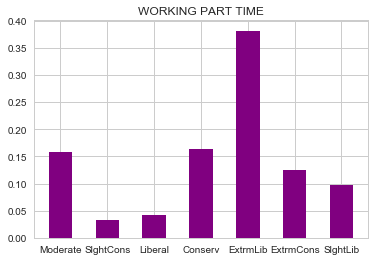

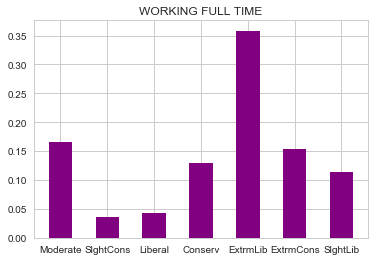

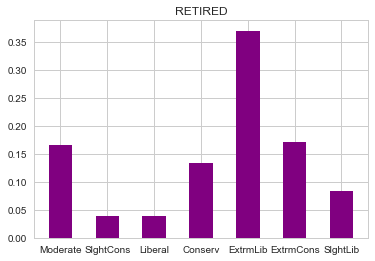

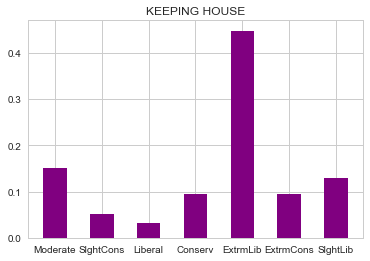

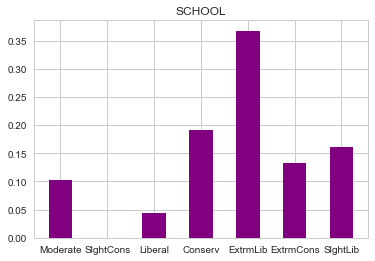

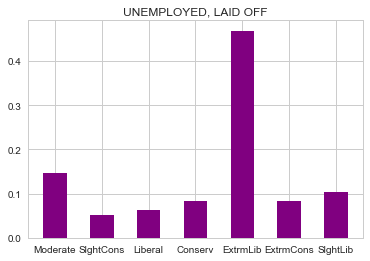

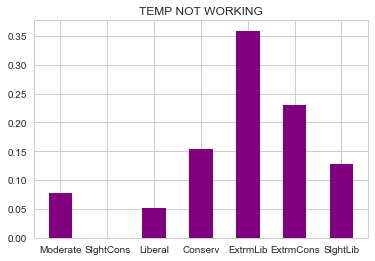

In [314]:
for i in range(len(wrkstat_label)):
    filterx = (politics_data.wrkstat == wrkstat_label[i])
    value_list = list(politics_data[filterx].groupby("polviews").size())
    total = sum(value_list)
    fig = plt.figure()
    plt.bar(range(7), value_list/total, tick_label = polviews_label, width = 0.5, color="purple")
    plt.title(wrkstat_label[i])
    plt.show()

Distribution of work status differs greatly among different subgroups of affiliation. And there seems to be interesting correlations between the two dimensions, which might be helpful for studying media usage. 

In [13]:
# explore political affiliation and media usage
data_poli_media = data[data.partyid != None][data.polviews != None][data.news != None][data.tvhours != None]

In [21]:
#reading newspaper and party identity
news_label = ["EVERYDAY", 'FEW TIMES A WEEK', "Once a week", "Never", 'LESS THAN ONCE WK']

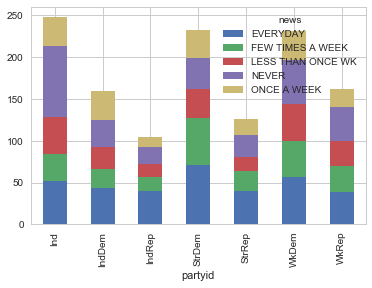

In [330]:
freq_party_news = data_poli_media.groupby(["partyid", "news"]).size().unstack().plot.bar(stacked = True)

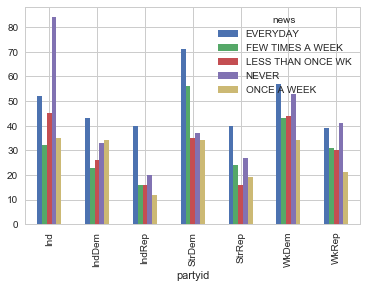

In [331]:
freq_party_news = data_poli_media.groupby(["partyid", "news"]).size().unstack().plot.bar()

In [17]:
data_poli_media[filterx].groupby("news").size()

news
EVERYDAY             130
FEW TIMES A WEEK      84
LESS THAN ONCE WK     79
NEVER                119
ONCE A WEEK           77
dtype: int64

In [19]:
data_poli_media.news = data_poli_media.news.astype("category", copy=False)


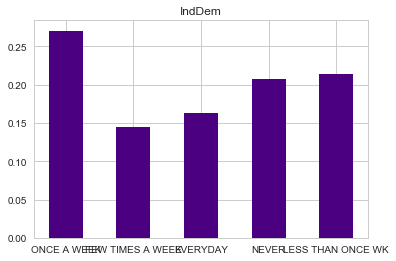

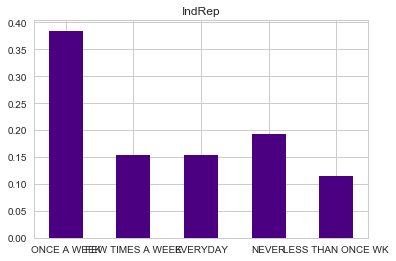

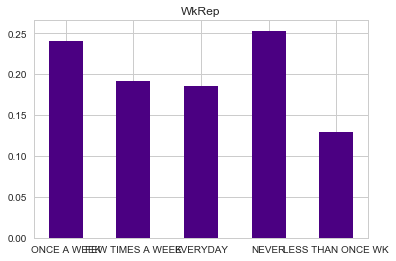

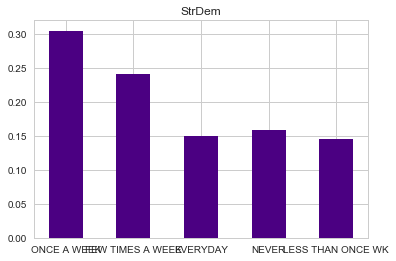

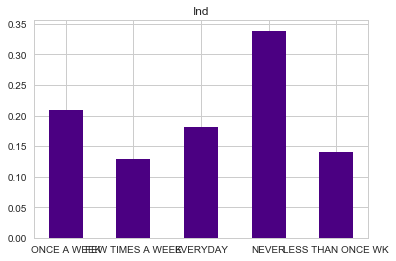

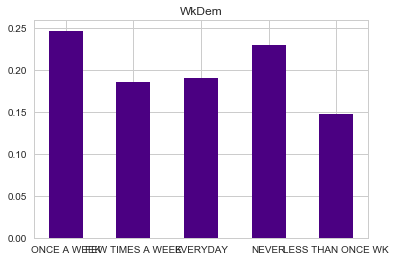

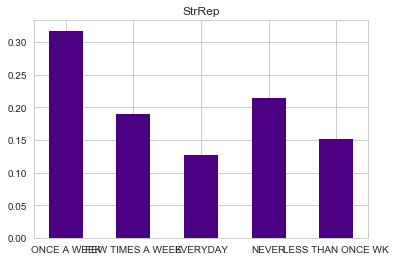

In [339]:
for i in range(len(party_label)):
    filterx = (data_poli_media.partyid == party_label[i])
    value_list = list(data_poli_media[filterx].groupby("news").size())
    total = sum(value_list)
    fig = plt.figure()
    plt.bar(range(5),value_list/total, tick_label = news_label, width = 0.5, color="indigo")
    plt.title(party_label[i])
    plt.show() 

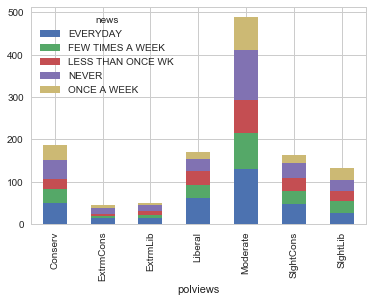

In [340]:
#reading news & political views
freq_poliviews_news = data_poli_media.groupby(["polviews", "news"]).size().unstack().plot.bar(stacked = True)

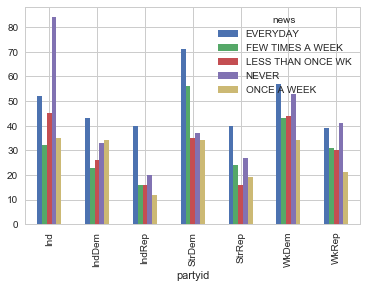

In [341]:
freq_party_news = data_poli_media.groupby(["partyid", "news"]).size().unstack().plot.bar()

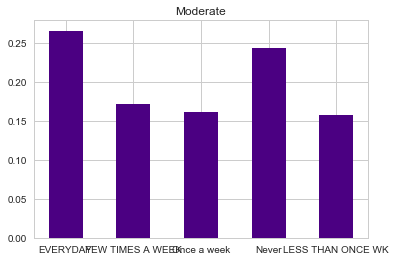

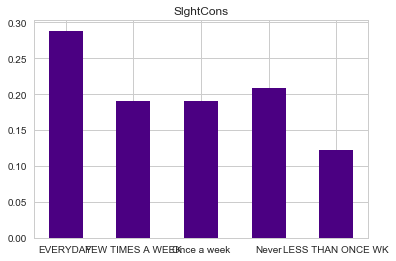

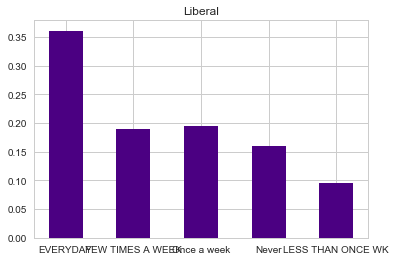

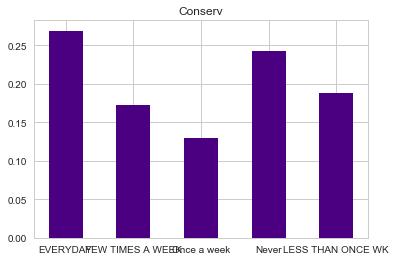

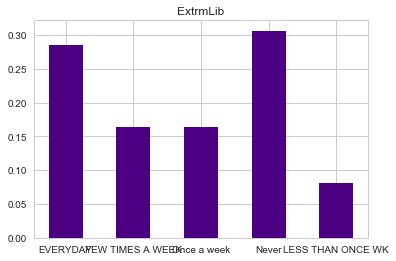

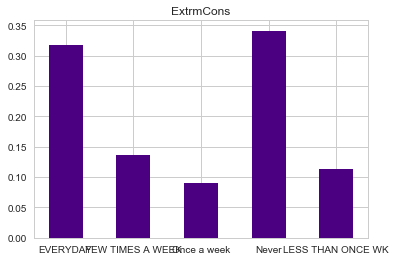

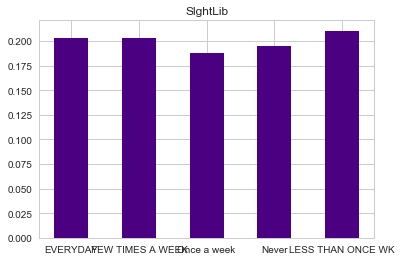

In [23]:
for i in range(len(polviews_label)):
    filterx = (data_poli_media.polviews == polviews_label[i])
    value_list = list(data_poli_media[filterx].groupby("news").size())
    total = sum(value_list)
    fig = plt.figure()
    plt.bar(range(5),value_list/total, tick_label = news_label, width = 0.5, color="indigo")
    plt.title(polviews_label[i])
    plt.show() 

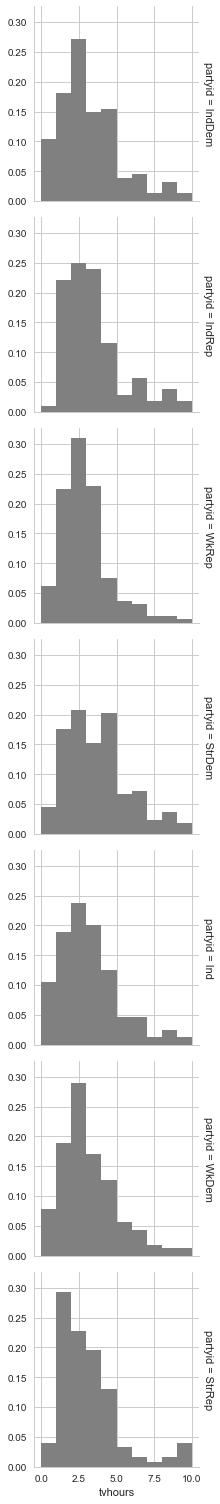

In [343]:
# watching tv 
# watching tv and party identity
data_partyid_tvhours =  data_poli_media.filter(["partyid", "tvhours"], axis =1)
grid = sns.FacetGrid(data_partyid_tvhours, row="partyid", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True, color = "gray")

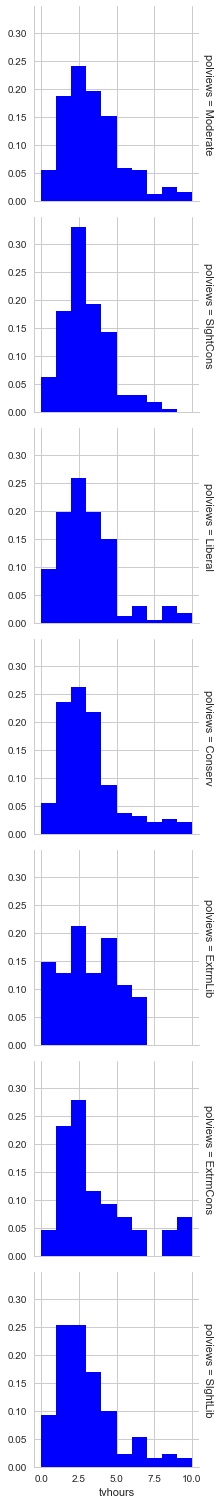

In [344]:
#watching tv and political views
data_polviews_tvhours =  data_poli_media.filter(["polviews", "tvhours"], axis =1)
grid = sns.FacetGrid(data_polviews_tvhours, row="polviews", margin_titles=True)
grid.map(plt.hist, "tvhours", bins=np.linspace(0, 10, 11), normed = True, color = "blue")